In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam

In [7]:
x_train, x_test = x_train/255.0, x_test/255.0

In [14]:
print(x_train.shape[2],x_test.shape)

28 (10000, 28, 28)


In [15]:
x_train = x_train.reshape(x_train.shape[0],(28*28))

In [21]:
x_test = x_test.reshape(x_test.shape[0],784)

In [38]:
x_train[0].shape

(784,)

In [31]:
i = Input(shape=x_train[0].shape)
x = Dense(32,activation='sigmoid')(i)
x = Dense(64,activation='sigmoid')(x)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [34]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=8,verbose=1)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6695 - accuracy: 0.8372 - val_loss: 0.2816 - val_accuracy: 0.9213
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2339 - accuracy: 0.9332 - val_loss: 0.2055 - val_accuracy: 0.9387
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1790 - accuracy: 0.9476 - val_loss: 0.1630 - val_accuracy: 0.9511
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1490 - accuracy: 0.9561 - val_loss: 0.1492 - val_accuracy: 0.9560
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1291 - accuracy: 0.9623 - val_loss: 0.1351 - val_accuracy: 0.9589
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9658 - val_loss: 0.1249 - val_accuracy: 0.9620
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.1207 - val_accuracy: 0.9637

In [35]:
import matplotlib.pyplot as plt

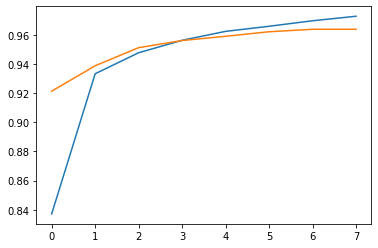

In [37]:
plt.plot(r.history['accuracy'],)
plt.plot(r.history['val_accuracy'])